## Classifying Diabetes

### The objective of this project is to fit a model to try and predict which people are at risk or already have Type-II Diabetes.

###### The info for this Dataset can be found [here:](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.html)
###### Specific feature info can be found [here:](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/Cdiabetes.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### The data can be downloaded with the url defined below, in the code blocks.

In [2]:
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/diabetes.csv'
df = pd.read_csv(url, sep = ',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
id          403 non-null int64
chol        402 non-null float64
stab.glu    403 non-null int64
hdl         402 non-null float64
ratio       402 non-null float64
glyhb       390 non-null float64
location    403 non-null object
age         403 non-null int64
gender      403 non-null object
height      398 non-null float64
weight      402 non-null float64
frame       391 non-null object
bp.1s       398 non-null float64
bp.1d       398 non-null float64
bp.2s       141 non-null float64
bp.2d       141 non-null float64
waist       401 non-null float64
hip         401 non-null float64
time.ppn    400 non-null float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


###### This Dataset has 403 observations and 19 variables, maximum # NAs is 262. It may be necessary to explore the NaNs since there's a significant amount. There are also three object-type(categorical) features; rest of the dataset is numerical.

In [4]:
# Observe the features
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0


In [5]:
df.tail()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0
402,41756,159.0,88,79.0,2.0,NaN,Louisa,68,female,64.0,220.0,medium,100.0,72.0,NaN,NaN,49.0,58.0,900.0


##### The features bp.2s and bp.2d seem to have a lot of NaNs 

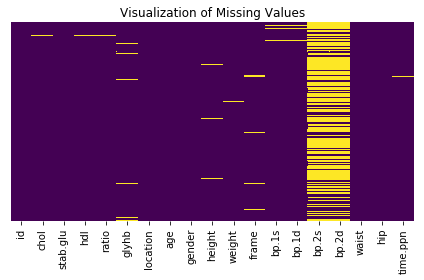

In [6]:
# Visualizing the null values
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')
plt.title('Visualization of Missing Values')
plt.tight_layout()
plt.show()

In [7]:
# From the plot above, we can see that the second systolic and disystolic blood pressure columns have too many missing
# values and therefore should be dropped.

# The following code will drop the two second blood pressure columns, as well as time.ppn and hip and waist because 
# the ratio variable contains information from both hip and waste, i.e ratio = hip/waist, the frame column also seems 
# to be a simmilar metric to ratio, essientially another size measurement.

df.drop(columns = ['id','bp.2s','bp.2d','time.ppn', 'hip', 'waist', 'frame'], inplace = True)

# The missing rows for glyhb should also be dropped because it will be the output for the ML model later on.
# Imputing for the output column data might lead to bias.

df.dropna(subset=['glyhb'], axis=0, inplace=True)

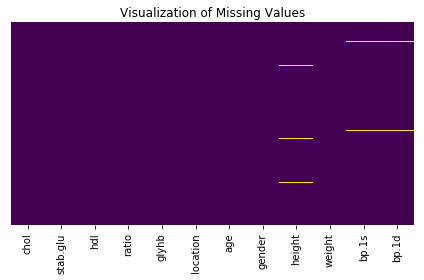

In [8]:
# Visualizing Null values again
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')
plt.title('Visualization of Missing Values')
plt.tight_layout()
plt.show()

In [9]:
df[df['height'].isna()]

,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,bp.1s,bp.1d
63,145.0,85,29.0,5.0,3.99,Buckingham,38,female,NaN,125.0,NaN,NaN
86,218.0,182,54.0,4.0,10.55,Louisa,51,female,NaN,215.0,139.0,69.0
195,173.0,83,37.0,4.7,4.31,Buckingham,40,female,NaN,130.0,122.0,76.0
231,214.0,87,35.0,6.1,5.38,Buckingham,44,female,NaN,190.0,140.0,75.0
317,300.0,65,59.0,5.1,4.56,Louisa,34,female,NaN,160.0,120.0,60.0


#### It seems that among all the people with missing heights, they all are female. It would be of interest to explore this further.

Text(0.5,1,'Height vs Gender')

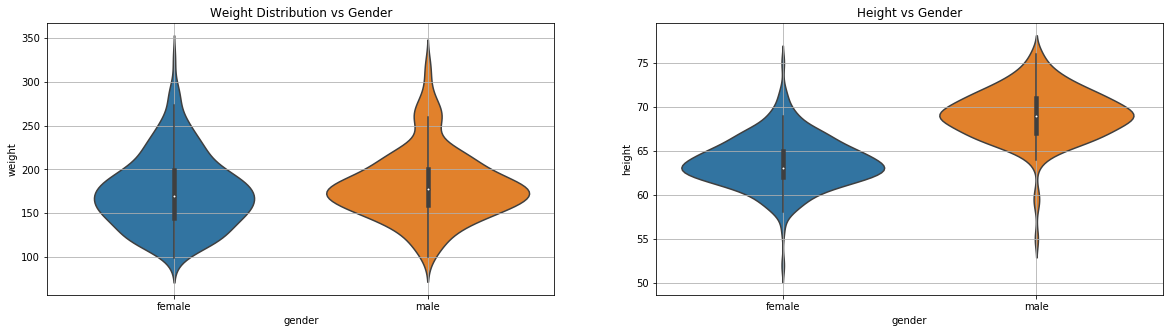

In [10]:
# Some visualizations for the height and gender features

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.violinplot(y ='weight', x = 'gender',data = df, split=True)
plt.grid()
plt.title('Weight Distribution vs Gender')

plt.subplot(1,2,2)
sns.violinplot(y ='height', x = 'gender',data = df, split=True )
plt.grid()
plt.title('Height vs Gender')


In [11]:
# Lets see the mean height by gender with a groupby statement
df.groupby(['gender'])['height'].mean()

gender
female    63.721973
male      69.098765
Name: height, dtype: float64

In [12]:
df.groupby(['gender'])['height'].std()

gender
female    2.876405
male      2.915390
Name: height, dtype: float64

#### From the groupby statements and plots, there seems to be a clear distinction among the heights in relation to the gender. The cutoff seems to be 65 and the average for females seem to be 63 +/- 2. Since all the people with missing heights are female, 63 may be the best value for imputation.

In [13]:
# Impute 63 for the missing heights

In [14]:
df.fillna(value={'height': 63}, inplace=True)

In [15]:
df.dropna(axis = 0, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 401
Data columns (total 12 columns):
chol        383 non-null float64
stab.glu    383 non-null int64
hdl         383 non-null float64
ratio       383 non-null float64
glyhb       383 non-null float64
location    383 non-null object
age         383 non-null int64
gender      383 non-null object
height      383 non-null float64
weight      383 non-null float64
bp.1s       383 non-null float64
bp.1d       383 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 38.9+ KB


In [17]:
383/401

0.9551122194513716

##### Notice all the features have 383 non-null observations. The last thing to do is to change the dtypes for the objects to categorical to free up the memory.

In [18]:
# convert object columns to catagorical for mone efficient memory storage
df.location = df.location.astype('category')
df.gender = df.gender.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 401
Data columns (total 12 columns):
chol        383 non-null float64
stab.glu    383 non-null int64
hdl         383 non-null float64
ratio       383 non-null float64
glyhb       383 non-null float64
location    383 non-null category
age         383 non-null int64
gender      383 non-null category
height      383 non-null float64
weight      383 non-null float64
bp.1s       383 non-null float64
bp.1d       383 non-null float64
dtypes: category(2), float64(8), int64(2)
memory usage: 33.8 KB


#### Now the memory usage is 33.8 KB insteat of 38.9+ KB as before. Next the categorical features will be one-hot-encoded in prparation for the ML models, and the output feature 'glyhb' also needs some processing.

In [19]:
cat = ['location','gender']
df = pd.get_dummies(df,columns=cat, drop_first=True) # One Hot Encoding for categorical features

In [20]:
# We need to change the glyhb feature from continuous to binary, and categorical
def is_diabetes(x):
    if x < 7:
        return 0
    else:
        return 1
df['diabetes'] = df['glyhb'].apply(is_diabetes)
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,location_Louisa,gender_male,diabetes
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,0,0,0
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,0,0,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,0,0,0
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,0,1,0
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,0,1,1


In [21]:
df['diabetes'].value_counts()

0    324
1     59
Name: diabetes, dtype: int64

#### The Data is now ready for model fitting using sklearn

## Fitting a model for a baseline prediction

In [22]:
# import all the libraries needed

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,location_Louisa,gender_male,diabetes
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,0,0,0
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,0,0,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,0,0,0
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,0,1,0
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,0,1,1


In [24]:
# Define X and y
X = df.drop(['glyhb','diabetes'], axis=1)
y = df['diabetes']

In [25]:
# Train-test split the data and stratify on y labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_test.value_counts())

(256, 11) (256,)
(127, 11) (127,)
0    109
1     18
Name: diabetes, dtype: int64


In [26]:
# Instantiate the LogisticRegression baseline model
lr = LogisticRegression()

In [27]:
# fit the model
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
# predict raw lables and also the probabilities 
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
lr_proba =lr.predict_proba(X_test)[:,1]
lr_proba_train = lr.predict_proba(X_train)[:,1]


In [29]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print('Raw Accuracy on train: ',accuracy_score(y_train,lr_pred_train))
print('Raw Accuracy on test: ',accuracy_score(y_test,lr_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,lr_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,lr_proba))

[[104   5]
 [  5  13]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       109
          1       0.72      0.72      0.72        18

avg / total       0.92      0.92      0.92       127

Raw Accuracy on train:  0.921875
Raw Accuracy on test:  0.9212598425196851
ROC-AUC on train:  0.954622802041974
ROC-AUC on test:  0.9026503567787972


### Compare with Random Forest Classifier

In [30]:
rf = RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=500)

In [31]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
# predict raw lables and also the probabilities 
rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)
rf_proba =rf.predict_proba(X_test)[:,1]
rf_proba_train = rf.predict_proba(X_train)[:,1]


In [33]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print('Raw Accuracy on train: ',accuracy_score(y_train,rf_pred_train))
print('Raw Accuracy on test: ',accuracy_score(y_test,rf_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,rf_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,rf_proba))

[[105   4]
 [  5  13]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       109
          1       0.76      0.72      0.74        18

avg / total       0.93      0.93      0.93       127

Raw Accuracy on train:  0.95703125
Raw Accuracy on test:  0.9291338582677166
ROC-AUC on train:  0.9945547362450369
ROC-AUC on test:  0.898572884811417


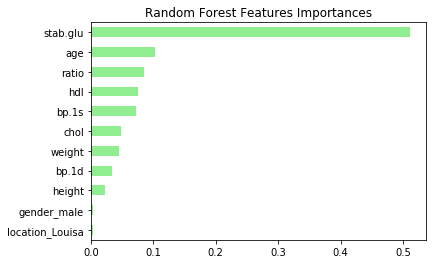

location_Louisa    0.003321
gender_male        0.003690
height             0.022158
bp.1d              0.033844
weight             0.044423
chol               0.047856
bp.1s              0.072161
hdl                0.075191
ratio              0.084265
age                0.102341
stab.glu           0.510749
dtype: float64


In [34]:
# Extract the feature importances from the rf_model
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort the feature importances
importances_sorted = importances.sort_values()

# Plot the importances
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Random Forest Features Importances')
plt.show()
print(importances_sorted)

In [35]:
df[['bp.1s','bp.1d','age','glyhb']].describe()

,bp.1s,bp.1d,age,glyhb
count,383.000000,383.000000,383.000000,383.000000
mean,137.224543,83.318538,46.838120,5.590862
std,23.032341,13.597923,16.549146,2.218075
min,90.000000,48.000000,19.000000,2.680000
25%,121.500000,75.000000,34.000000,4.390000
50%,136.000000,82.000000,45.000000,4.850000
75%,148.000000,91.000000,60.000000,5.615000
max,250.000000,124.000000,92.000000,16.110001


The features bp.1s and bp.1d are respectively the systolic and diasystolic blood pressures measured in mmHg. The normal range for healty individuals is 120/80 or also known as "120 over 80 BP". If either the numerator or denominator values are higher than these two values respectively, then that person is usually diagnosed with "High BP". A new feature can be engineered from these two features which essentialy indicate if a person has high/low BP. 

In [36]:
df.rename(columns={'bp.1s':'systolic','bp.1d':'diasystolic'}, inplace = True)
def isBP_high(cols):
    systolic = cols[0]
    diasystolic = cols[1]
    if systolic >= 130.0 and diasystolic > 80: # condition for Stage-1 Hypertension(High BP)
        return 1
    else:
        return 0
# Define a new binary feature for BP
df['hypertension'] = df.rename(columns={'bp.1s':'systolic','bp.1d':'diasystolic'})[['systolic','diasystolic']].apply(isBP_high, axis=1)
#df.drop(['systolic','diasystolic'], axis=1, inplace=True)

In [37]:
df.drop(['systolic','diasystolic'], axis=1, inplace=True) # Don't need bp.1s, bp.1d.
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,location_Louisa,gender_male,diabetes,hypertension
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,0,0,0,0
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,0,0,0,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,0,0,0,1
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,0,1,0,0
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,0,1,1,0


In [38]:
df['hypertension'].value_counts()

0    212
1    171
Name: hypertension, dtype: int64

In [39]:
df['bmi'] = round((df['height']**2)/df['weight'],2)
def is_obese(bmi):
    if bmi > 29.9:
        return 1
    else:
        return 0
df['obese'] = df['bmi'].apply(is_obese)
    

In [40]:
df.head()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,location_Louisa,gender_male,diabetes,hypertension,bmi,obese
0,203.0,82,56.0,3.6,4.31,46,62.0,121.0,0,0,0,0,31.77,1
1,165.0,97,24.0,6.9,4.44,29,64.0,218.0,0,0,0,0,18.79,0
2,228.0,92,37.0,6.2,4.64,58,61.0,256.0,0,0,0,1,14.54,0
3,78.0,93,12.0,6.5,4.63,67,67.0,119.0,0,1,0,0,37.72,1
4,249.0,90,28.0,8.9,7.72,64,68.0,183.0,0,1,1,0,25.27,0


In [41]:
df['obese'].value_counts()

0    298
1     85
Name: obese, dtype: int64

In [42]:
df.columns.values

array(['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 'height',
       'weight', 'location_Louisa', 'gender_male', 'diabetes',
       'hypertension', 'bmi', 'obese'], dtype=object)

In [43]:
X = df.drop(['glyhb','diabetes','height','weight','bmi'], axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 123)


In [44]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
# predict raw lables and also the probabilities 
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
lr_proba =lr.predict_proba(X_test)[:,1]
lr_proba_train = lr.predict_proba(X_train)[:,1]


In [46]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print('Raw Accuracy on train: ',accuracy_score(y_train,lr_pred_train))
print('Raw Accuracy on test: ',accuracy_score(y_test,lr_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,lr_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,lr_proba))

[[105   4]
 [  6  12]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.95       109
          1       0.75      0.67      0.71        18

avg / total       0.92      0.92      0.92       127

Raw Accuracy on train:  0.9140625
Raw Accuracy on test:  0.9212598425196851
ROC-AUC on train:  0.9334089619965967
ROC-AUC on test:  0.8873598369011213


In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)
rf_proba =rf.predict_proba(X_test)[:,1]
rf_proba_train = rf.predict_proba(X_train)[:,1]


In [49]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print('Raw Accuracy on train: ',accuracy_score(y_train,rf_pred_train))
print('Raw Accuracy on test: ',accuracy_score(y_test,rf_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,rf_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,rf_proba))

[[105   4]
 [  5  13]]
             precision    recall  f1-score   support

          0       0.95      0.96      0.96       109
          1       0.76      0.72      0.74        18

avg / total       0.93      0.93      0.93       127

Raw Accuracy on train:  0.9453125
Raw Accuracy on test:  0.9291338582677166
ROC-AUC on train:  0.9927396483267158
ROC-AUC on test:  0.9148827726809379


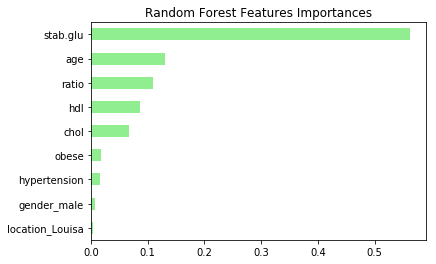

location_Louisa    0.003696
gender_male        0.006875
hypertension       0.016822
obese              0.016954
chol               0.067176
hdl                0.085868
ratio              0.109302
age                0.131163
stab.glu           0.562145
dtype: float64


In [50]:
# Extract the feature importances from the rf_model
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort the feature importances
importances_sorted = importances.sort_values()

# Plot the importances
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Random Forest Features Importances')
plt.show()
print(importances_sorted)

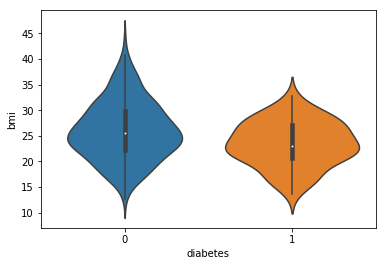

In [51]:
sns.violinplot(x = 'diabetes', y = 'bmi', data=df)

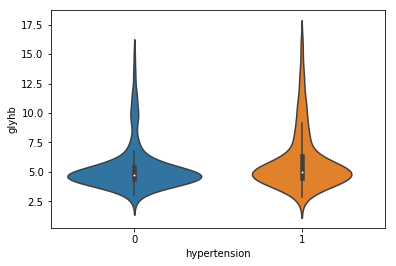

In [52]:
sns.violinplot(x = 'hypertension', y = 'glyhb', data=df)

In [53]:
# First define a function to compute the ROC-AUC score metric
def auc(variables, target, basetable):
    X = basetable[variables]
    Y = basetable[target]
    
    logreg = LogisticRegression()
    logreg.fit(X, Y)
    
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)
        
    
# Second compute the next best feature which would give a higher AUC score

def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        if auc_v > best_auc:
            best_auc = auc_v
            best_variable = v
    return best_variable



In [54]:
target = ['diabetes']
candidate_variables = list(X.columns.values)

#candidate_variables.remove('stab.glu')
print(candidate_variables)

['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'location_Louisa', 'gender_male', 'hypertension', 'obese']


In [55]:
current_variables = []
max_number_variables = 8
number_iterations = min(max_number_variables, len(candidate_variables))
for i in range(0,number_iterations):
    next_variable = next_best(current_variables,candidate_variables,target,df)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
print(current_variables)

['stab.glu', 'obese', 'age', 'hypertension', 'ratio', 'gender_male', 'location_Louisa', 'chol']


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
def auc_train_test(feature,target,train,test):
    X_train = train[feature]
    X_test = test[feature]
    Y_train = train[target]
    Y_test = test[target]
    
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    
    pred_train = lr.predict_proba(X_train)[:,1]
    pred_test = lr.predict_proba(X_test)[:,1] 
    
    auc_train = roc_auc_score(Y_train, pred_train)
    auc_test = roc_auc_score(Y_test, pred_test)
   
    return(auc_train, auc_test)

In [57]:
# Carry out 60-40 partititioning with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size= 0.5, random_state= 123)

train = pd.concat([X_train, Y_train], axis=1)
test = pd.concat([X_test, Y_test], axis=1)
train.head()

,chol,stab.glu,hdl,ratio,age,location_Louisa,gender_male,hypertension,obese,diabetes
337,261.0,101,83.0,3.1,52,1,0,1,0,0
25,179.0,80,92.0,1.9,41,0,0,1,1,0
209,211.0,225,29.0,7.3,61,0,0,1,0,1
391,221.0,126,48.0,4.6,59,1,0,0,0,0
256,235.0,109,59.0,4.0,62,0,0,0,0,1


In [58]:
print(current_variables)

['stab.glu', 'obese', 'age', 'hypertension', 'ratio', 'gender_male', 'location_Louisa', 'chol']


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


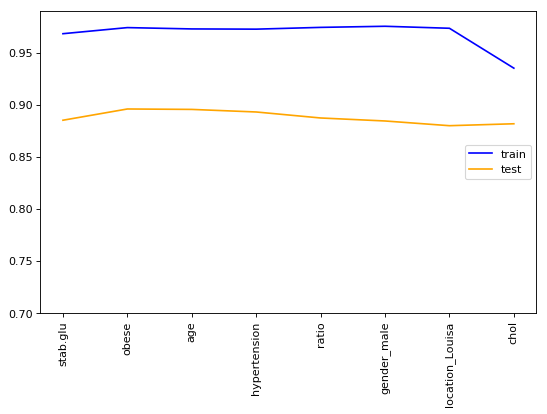

In [59]:
variables = current_variables
# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []

# Add variables one by one
variables_evaluate = []

# Iterate over the variables in variables
for v in variables:
    # Add the variable
    variables_evaluate.append(v)
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate,['diabetes'],train,test)
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    
x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)

fig=plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train, color='blue', label = 'train')
plt.plot(x,y_test, color='orange', label='test')
plt.ylim((0.7, 0.99))
plt.legend(loc=5)
plt.figure(figsize=(18,16))
plt.show()

In [60]:
X = df[['stab.glu', 'obese', 'age']]
y = df.diabetes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state= 123)


In [61]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
# predict raw lables and also the probabilities 
lr_pred = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
lr_proba =lr.predict_proba(X_test)[:,1]
lr_proba_train = lr.predict_proba(X_train)[:,1]


In [63]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))
print('Raw Accuracy on train: ',accuracy_score(y_train,lr_pred_train))
print('Raw Accuracy on test: ',accuracy_score(y_test,lr_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,lr_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,lr_proba))

[[127   4]
 [  8  15]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       131
          1       0.79      0.65      0.71        23

avg / total       0.92      0.92      0.92       154

Raw Accuracy on train:  0.9213973799126638
Raw Accuracy on test:  0.922077922077922
ROC-AUC on train:  0.9548071387449626
ROC-AUC on test:  0.9133753733820111


In [64]:
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'penalty': ['l1','l2']
          }
base = LogisticRegression()
clf = GridSearchCV(base,param_grid=params, cv=10, verbose=0)

In [65]:
clf.fit(X,y)
# View best hyperparameters
clf.best_params_

{'C': 1, 'penalty': 'l1'}

In [66]:
clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
model = clf.best_estimator_
model.fit(X_train,y_train)
prediction_train = model.predict(X_train)
prediction = model.predict(X_test)
prediction_proba = model.predict_proba(X_test)[:,1]
prediction_train_proba = lr.predict_proba(X_train)[:,1]

print(confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print('Raw Accuracy on train: ',accuracy_score(y_train,prediction_train))
print('Raw Accuracy on test: ',accuracy_score(y_test,prediction))

print('ROC-AUC on train: ', roc_auc_score(y_train,prediction_train_proba))
print('ROC-AUC on test: ', roc_auc_score(y_test,prediction_proba))

[[127   4]
 [  8  15]]
             precision    recall  f1-score   support

          0       0.94      0.97      0.95       131
          1       0.79      0.65      0.71        23

avg / total       0.92      0.92      0.92       154

Raw Accuracy on train:  0.925764192139738
Raw Accuracy on test:  0.922077922077922
ROC-AUC on train:  0.9548071387449626
ROC-AUC on test:  0.9097245270494524


In [68]:
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
rf_pred = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)
rf_proba =rf.predict_proba(X_test)[:,1]
rf_proba_train = rf.predict_proba(X_train)[:,1]


In [83]:
# Check the performance to get some baseline result to work with
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print('Raw Accuracy on train: ',accuracy_score(y_train,rf_pred_train))
print('Raw Accuracy on test: ',accuracy_score(y_test,rf_pred))

print('ROC-AUC on train: ', roc_auc_score(y_train,rf_proba_train))
print('ROC-AUC on test: ', roc_auc_score(y_test,rf_proba))

[[125   6]
 [  7  16]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       131
          1       0.73      0.70      0.71        23

avg / total       0.91      0.92      0.91       154

Raw Accuracy on train:  0.9475982532751092
Raw Accuracy on test:  0.9155844155844156
ROC-AUC on train:  0.989349453080023
ROC-AUC on test:  0.904414205111185


In [81]:
results = cross_val_score(rf, X_train, y_train, cv=4, scoring='roc_auc')
print('mean roc-auc score: %f' % results.mean(), 'std.: %f' % results.std())

mean roc-auc score: 0.958215 std.: 0.029331


In [82]:
print(results)

[0.91156463 0.97685185 0.98842593 0.95601852]


In [79]:
results = cross_val_score(clf, X_train, y_train, cv=4, scoring='roc_auc')
print('mean roc-auc score: %f' % results.mean(), 'std.: %f' % results.std())

mean roc-auc score: 0.964546 std.: 0.026977


In [80]:
print(results)

[0.91836735 0.97453704 0.97916667 0.98611111]


In [75]:
#mean_auc = [0,0]
#mean_acc = [0,0]
#for i in range(2,15):
#    results1 = cross_val_score(clf, X, y, cv= i, scoring='roc_auc')
#    results2 = cross_val_score(clf, X, y, cv= i, scoring='accuracy')
#    mean_auc.append(results1.mean())
#    mean_acc.append(results2.mean())
    

The above code will produce the lists created below, but takes a few seconds to run, which is why its hashed out.

In [76]:
mean_auc = [0, 0, 0.9247410245494537, 0.9416585445094215, 
            0.9409024103468547, 0.9408391608391609, 0.944718792866941, 
            0.9407450846511901, 0.9402112369337978, 0.9395208700764256, 0.942114898989899, 
            0.9367049808429119, 0.9412037037037039, 0.9356602564102564, 0.9400879917184267]
mean_acc = [0, 0, 0.9138170811518325, 0.9190657808398951, 0.9217379385964912, 
            0.9218701298701297, 0.921792328042328, 0.9240414347557205, 0.9243434740917644, 
            0.9243878429924942,0.924355326986906, 0.9243230625583567, 0.9243951612903226, 0.9245737021599089,
            0.9239222508926943]

In [77]:

print(mean_auc)
print(mean_acc)

[0, 0, 0.9247410245494537, 0.9416585445094215, 0.9409024103468547, 0.9408391608391609, 0.944718792866941, 0.9407450846511901, 0.9402112369337978, 0.9395208700764256, 0.942114898989899, 0.9367049808429119, 0.9412037037037039, 0.9356602564102564, 0.9400879917184267]
[0, 0, 0.9138170811518325, 0.9190657808398951, 0.9217379385964912, 0.9218701298701297, 0.921792328042328, 0.9240414347557205, 0.9243434740917644, 0.9243878429924942, 0.924355326986906, 0.9243230625583567, 0.9243951612903226, 0.9245737021599089, 0.9239222508926943]


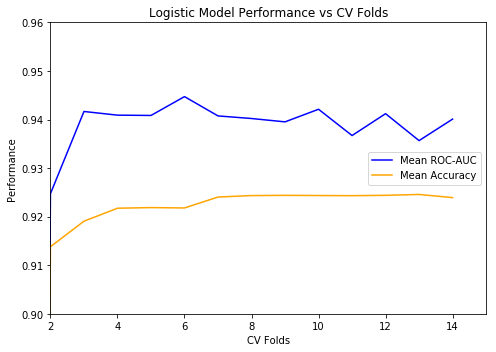

In [90]:
plt.figure(figsize=(7,5))
plt.xlim(2,len(mean_auc))
plt.ylim(0.90,0.96)
plt.plot(mean_auc, color='blue', label='Mean ROC-AUC')
plt.plot(mean_acc, color='orange', label = 'Mean Accuracy')
plt.xlabel('CV Folds')
plt.ylabel('Performance')
plt.title('Logistic Model Performance vs CV Folds')
plt.tight_layout()
plt.legend(loc=5)